<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Plane_Beach_Refdif1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mqquiroz/Refdif1.git
%cd Refdif1/
!make all
%cd ..
!mkdir modelo_REFDIF
%cd Refdif1/
%cp -r 'datgen' 'refdif1' 'surface' '/content/modelo_REFDIF'
%cd ..
!rm -r Refdif1
%cd modelo_REFDIF
!chmod +x datgen refdif1 surface
#!chmod +rx ./datgen ./refdif1 ./surface
import os
cwd = os.getcwd()
os.environ['PATH'] += ":"+cwd
%cd ..

Cloning into 'Refdif1'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
/content/Refdif1
gfortran -std=legacy -c -O refdif1v25.f
refdif1v25.f:635:0:

      &(j)+dir(ifreq,i+1)))*2.
 
refdif1v25.f:633:0:

       do 6 i=1,nn
 
note: within this loop
refdif1v25.f:629:0:

       dir(ifreq,ip1)=2.*pi*seed/100.
 
refdif1v25.f:626:0:

       do 5 i=1,nn
 
note: within this loop
refdif1v25.f:624:0:

      &p)+cos(thi(i)-dth/2.)**(2*nsp))
 
refdif1v25.f:619:0:

       do 4 i=1,nn
 
note: within this loop
gfortran -std=legacy -c -O infile1.f
gfortran -std=legacy -o refdif1 refdif1v25.o infile1.o 
gfortran -std=legacy -c -O datgenv25.f
gfortran -std=legacy -o datgen datgenv25.o infile1.o
gfortran -std=legacy -c -O surface.f
gfortran -std=legacy -o surface surface.o
/content
/content/Refdif1
/content
/content/mo

In [10]:
!datgen

 ***********  parabolic model in rectangular grid  **********

 input type of bottom desired

 1=surface piercing island
 2=bbr, submerged shoal
 3=arthur rip current
 4=test case, planar bottom
 5=radder(1979), configuration 2
 6=grazing incidence on linear caustic
 7=whalin's channel
 8=surface piercing breakwater
 9=channel
10=breakwater
4
  input m,n,dx,dy,depth,period
100,100,5,5,10,8
  input bottom slope
0.02
  do you want to create indat.dat? yes=1
1
  input iu: 1=mks, 2=english
1
  input dispersion relationship; ntype: 0=linear,
                           1=composite, 2=stokes
0
  input lateral boundary condition; ibc: 0=closed
                                         1=open
1
 input ispace (0=program picks x spacing, 1=user choses)
0
  input nd (# y divisions, 1 is minimum)
1
 input if(1) turbulent, if(2) porous, if(3) laminar
   standard  choice:  1, 0, 0
0,0,0
 input isp (subgrid features) :standard  0
0
 input values of iinput, ioutput:
 iinput: 1 standard, i.e., not starti

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
Grilla = np.genfromtxt('refdat.dat')#,filling_values=np.nan)
np.shape(Grilla)

mr = 100
nr = 100

DXR = 5.0
DYR = 5.0

xp = np.linspace(5,495+5,mr)
#xp = np.linspace(495+5,5,mr)

#xp = np.linspace(495+5,0,nx)
y  = np.linspace(-(495+5)/2,(495+5)/2,nr)
#y  = np.linspace(495/2,-495/2,ny)

X,Y = np.meshgrid(xp,y)

h = 0.02*X
print(np.max(h))

np.shape(Grilla)

Depth = Grilla[:500,:]
Depth = Depth.reshape(100,100)
np.max(Depth)

10.0


10.0

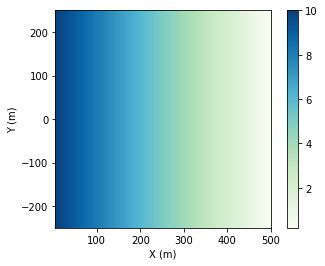

In [13]:
plt.pcolormesh(X,Y,Depth.T,cmap='GnBu')
plt.colorbar()
plt.gca().set_aspect('equal')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [14]:
!refdif1

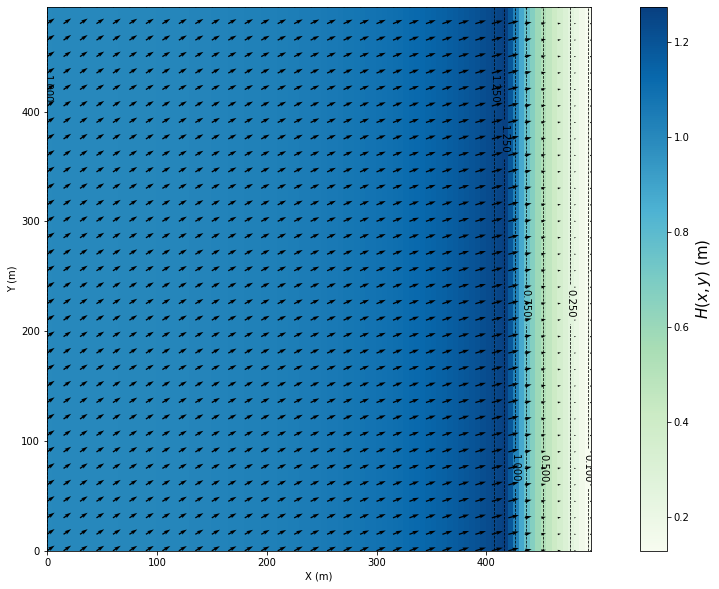

In [15]:
h     = np.loadtxt('depth.dat')
H     = np.loadtxt('height.dat')
angle = np.loadtxt('angle.dat')
nx,ny = np.shape(h)

x = DXR*np.arange(1,nx+1)-DXR
y = DYR*np.arange(1,ny+1)-DYR
#y  = np.linspace(-495/2,495/2,ny)

X,Y = np.meshgrid(x,y)


DX = H*np.cos(np.pi*angle/180)
DY = H*np.sin(np.pi*angle/180)

nd = 3

alto  = 10
ancho = 17.5
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,H.T,cmap='GnBu')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$H (x,y)$ (m)',fontsize=15)
CS = plt.contour(X,Y,H.T,levels=[0.1,0.25,0.5,0.75,1.0,1.25,1.5],colors='k',linewidths=0.75,linestyles='dashed')
plt.clabel(CS, CS.levels, inline=True, fontsize=10)

plt.quiver(X[::nd,::nd],Y[::nd,::nd],DX.T[::nd,::nd],DY.T[::nd,::nd])
plt.gca().set_aspect('equal')
plt.xlim(0,495)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [16]:
!surface

 enter output file name in single quotes
'eta.dat'
  number of y points =          100
  maximum y =    495.000000    
  number of x points in file =          101
  maximum x =    495.000000    
  grid spacing (x and y) in new image =    5.00000000    
  number of x points in interpolated image =          100


(100, 100)


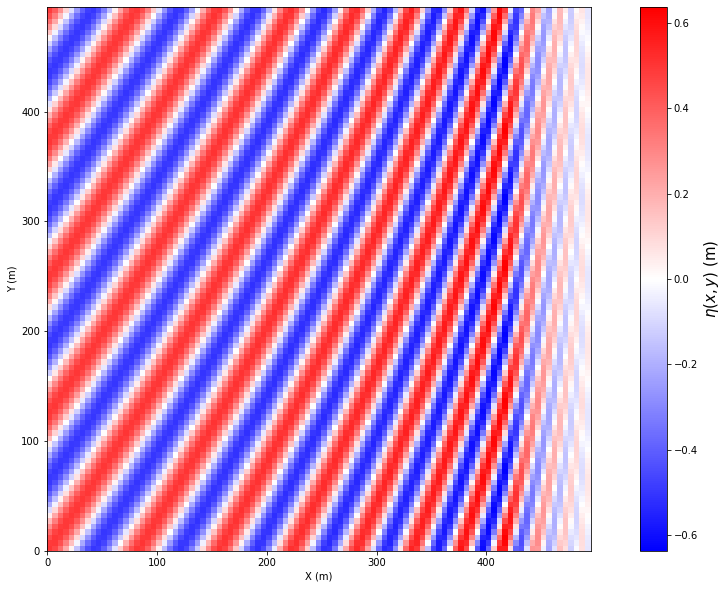

In [70]:
eta = np.loadtxt('eta.dat')

print(np.shape(eta))
alto  = 10
ancho = 17.5
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,eta.T,cmap='bwr')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\eta (x,y)$ (m)',fontsize=15)
plt.gca().set_aspect('equal')
#plt.xlim(0,495)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [72]:
y

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
       220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
       275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
       330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
       385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
       440., 445., 450., 455., 460., 465., 470., 475., 480., 485., 490.,
       495.])

In [66]:
@np.vectorize
def disper(T,h,delta_c=0.00001,tol=1e-7):
  #constante
  g = 9.81 #m/s2
  f = 1/T
  C = np.sqrt(g*h)
  for i in range(50):
    k = 2*np.pi*f/C
    C = np.sqrt((g/k)*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

In [67]:
T = 8
w = 2*np.pi/T
C = disper(T,h)
k = w/C

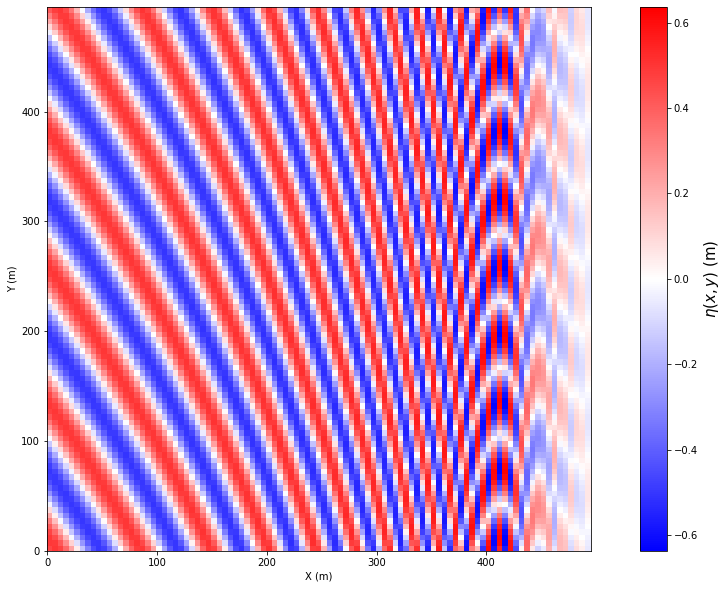

In [68]:
wave = (H/2)*np.cos((k*np.cos(np.pi*angle/180)*X.T) + (k*np.sin(np.pi*angle/180)*Y.T) - (w*0.5) )

alto  = 10
ancho = 17.5
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,wave.T,cmap='bwr')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\eta (x,y)$ (m)',fontsize=15)
plt.gca().set_aspect('equal')
plt.xlim(0,495)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()